# Bounding box detection - Racoon data


## Data files
- images_racoon.zip: contain images of racoons
- train_labels.csv: contains coordinates for bounding box for every image

### Import the necessary libraries

In [91]:
import pandas as pd
import numpy as np
import os

from google.colab import drive

from tensorflow.keras.applications.mobilenet import MobileNet,preprocess_input
from PIL import Image

import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.backend import epsilon
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.layers import Conv2D, Reshape,GlobalAveragePooling2D, RepeatVector, Conv1D,Flatten

import matplotlib.pyplot as plt
from matplotlib import patches

### Mount to drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Change directory

In [3]:
os.chdir('/content/drive/MyDrive/ACN Lab 10')

In [4]:
os.getcwd()

'/content/drive/MyDrive/ACN Lab 10'

In [6]:
!unzip -q '/content/drive/MyDrive/ACN Lab 10/images.zip' 

replace images/raccoon-166.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

#####unzip not executed now as we already have unzipped images in folder

### Load the training data from train.csv file

In [7]:
train=pd.read_csv("train_labels.csv")

### Print the shape of the train dataset

In [8]:
train.shape

(173, 8)

In [9]:
train.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,raccoon-17.jpg,259,194,raccoon,95,60,167,118
1,raccoon-11.jpg,660,432,raccoon,3,1,461,431
2,raccoon-63.jpg,600,400,raccoon,74,107,280,290
3,raccoon-63.jpg,600,400,raccoon,227,93,403,298
4,raccoon-60.jpg,273,185,raccoon,58,33,197,127


### Declare a variable IMAGE_SIZE = 128 as we will be using MobileNet which will be taking Input shape as 128 * 128 

In [10]:
IMAGE_SIZE = 128

### With the help of csv.reader write a for loop which can load the train.csv file and store the path, width and height, x0, y0, x1, y1 in individual variables. <br>
1. Create a list variable known as 'paths' which has all the path for all the training images
2. Create an array 'coords' which has the resized coordinates of the bounding box for the training images

<u>Note:</u> All the training images should be resized to 128 * 128 as it is the input shape of MobileNet (which we will be using for Object detection). Hence the corresponding coordinates of the bounding boxes should be changed to match the image dimension of 128 * 128 

In [11]:
paths = []
coords = np.zeros((train.shape[0],4))

In [12]:
for i, row in train.iterrows():
  paths.append(row['filename'])
  coords[i,0] = row['xmin'] * IMAGE_SIZE / row['width']
  coords[i,1] = row['ymin'] * IMAGE_SIZE / row['height']
  coords[i,2] = row['xmax'] * IMAGE_SIZE / row['width']
  coords[i,3] = row['ymax'] * IMAGE_SIZE / row['height']


In [13]:
paths

['raccoon-17.jpg',
 'raccoon-11.jpg',
 'raccoon-63.jpg',
 'raccoon-63.jpg',
 'raccoon-60.jpg',
 'raccoon-69.jpg',
 'raccoon-180.jpg',
 'raccoon-200.jpg',
 'raccoon-141.jpg',
 'raccoon-19.jpg',
 'raccoon-84.jpg',
 'raccoon-124.jpg',
 'raccoon-182.jpg',
 'raccoon-111.jpg',
 'raccoon-91.jpg',
 'raccoon-79.jpg',
 'raccoon-93.jpg',
 'raccoon-20.jpg',
 'raccoon-42.jpg',
 'raccoon-139.jpg',
 'raccoon-58.jpg',
 'raccoon-71.jpg',
 'raccoon-183.jpg',
 'raccoon-1.jpg',
 'raccoon-169.jpg',
 'raccoon-82.jpg',
 'raccoon-4.jpg',
 'raccoon-101.jpg',
 'raccoon-10.jpg',
 'raccoon-166.jpg',
 'raccoon-184.jpg',
 'raccoon-38.jpg',
 'raccoon-120.jpg',
 'raccoon-142.jpg',
 'raccoon-149.jpg',
 'raccoon-51.jpg',
 'raccoon-43.jpg',
 'raccoon-123.jpg',
 'raccoon-66.jpg',
 'raccoon-9.jpg',
 'raccoon-178.jpg',
 'raccoon-47.jpg',
 'raccoon-167.jpg',
 'raccoon-54.jpg',
 'raccoon-77.jpg',
 'raccoon-155.jpg',
 'raccoon-89.jpg',
 'raccoon-153.jpg',
 'raccoon-179.jpg',
 'raccoon-115.jpg',
 'raccoon-64.jpg',
 'raccoon-56

In [14]:
coords

array([[4.69498069e+01, 3.95876289e+01, 8.25328185e+01, 7.78556701e+01],
       [5.81818182e-01, 2.96296296e-01, 8.94060606e+01, 1.27703704e+02],
       [1.57866667e+01, 3.42400000e+01, 5.97333333e+01, 9.28000000e+01],
       [4.84266667e+01, 2.97600000e+01, 8.59733333e+01, 9.53600000e+01],
       [2.71941392e+01, 2.28324324e+01, 9.23663004e+01, 8.78702703e+01],
       [7.49268293e+00, 5.72357724e+00, 1.17385366e+02, 1.24878049e+02],
       [2.53866667e+01, 6.72000000e+00, 7.85066667e+01, 1.27680000e+02],
       [5.24750958e+01, 6.63212435e+00, 1.22114943e+02, 1.10093264e+02],
       [5.14056225e-01, 6.33663366e-01, 7.91646586e+01, 1.11524752e+02],
       [4.29961390e+01, 5.27835052e+00, 8.99459459e+01, 5.87216495e+01],
       [1.30957096e+01, 4.62650602e+00, 8.32211221e+01, 1.25686747e+02],
       [8.40154440e+00, 2.57319588e+01, 1.18115830e+02, 9.69896907e+01],
       [4.35200000e+00, 3.12320000e+01, 7.14240000e+01, 1.27744000e+02],
       [6.83333333e+00, 6.66666667e-01, 1.13833333e

### Write a for loop which can load all the training images into a variable 'batch_images' using the paths from the 'paths' variable
<u>Note:</u> Convert the image to RGB scale as the MobileNet accepts 3 channels as inputs   

In [15]:
os.getcwd()

'/content/drive/MyDrive/ACN Lab 10'

In [16]:
len(paths)

173

In [17]:
len(coords)

173

In [18]:
batch_images = np.zeros((len(paths),IMAGE_SIZE,IMAGE_SIZE,3),dtype=np.float32)

for i,j in enumerate(paths):
  #print(j)
  img = Image.open('images/'+j)
  img = img.resize((IMAGE_SIZE, IMAGE_SIZE))
  img = img.convert('RGB')
  batch_images[i] = preprocess_input(np.array(img,dtype=np.float32))


In [19]:
batch_images.shape

(173, 128, 128, 3)

In [20]:
coords.shape

(173, 4)

In [21]:
batch_images

array([[[[-0.38823527, -0.20784312, -0.3098039 ],
         [-0.8901961 , -0.7647059 , -0.84313726],
         [-0.9137255 , -0.8509804 , -0.8980392 ],
         ...,
         [ 0.04313731,  0.5137255 ,  0.05882359],
         [ 0.04313731,  0.4666667 ,  0.18431377],
         [ 0.26274514,  0.654902  ,  0.38823533]],

        [[-0.4352941 , -0.27843136, -0.36470586],
         [-0.9529412 , -0.8666667 , -0.92941177],
         [-0.8509804 , -0.79607844, -0.827451  ],
         ...,
         [-0.23921567,  0.21568632, -0.23921567],
         [-0.0745098 ,  0.33333337,  0.00392163],
         [ 0.09019613,  0.4431373 ,  0.20784318]],

        [[-0.7019608 , -0.5764706 , -0.64705884],
         [-0.85882354, -0.77254903, -0.8117647 ],
         [-0.81960785, -0.78039217, -0.78039217],
         ...,
         [-0.2862745 ,  0.1686275 , -0.5058824 ],
         [-0.1607843 ,  0.26274514, -0.31764704],
         [-0.08235294,  0.254902  , -0.02745098]],

        ...,

        [[-0.04313725,  0.27843142, -0

In [22]:
len(coords)

173

In [23]:
len(paths)

173

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


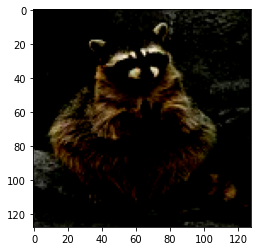

In [25]:
plt.imshow(batch_images[5])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


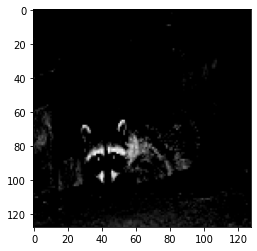

In [26]:
plt.imshow(batch_images[172])
plt.show()

### Import MobileNet and load MobileNet into a variable named 'model' which takes input shape of 128 * 128 * 3.
### Freeze all the layers and Add convolution layers and reshape layers at the end to ensure the output has 4 coordinates.

Import statements are at the top

In [27]:
model = MobileNet(input_shape=(IMAGE_SIZE,IMAGE_SIZE,3),include_top=False)

for layer in model.layers:
  layer.trainable = False  #taking initial weights from pretrained model

x = model.layers[-1].output
x = Conv2D(4,kernel_size=4)(x)

x = Reshape((4,))(x)

model = Model(inputs=model.input,outputs=x)

In [28]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32)        128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 64, 64, 32)        0     

## Plot the model and view the whole skeleton using plot_model.

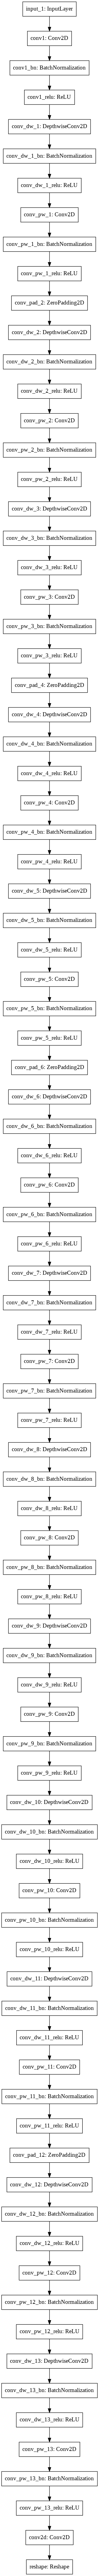

In [29]:
plot_model(model)

### Define a custom loss function IoU which calculates Intersection Over Union

In [30]:
def loss(gt,pred):
    intersections = 0
    unions = 0
    diff_width = np.minimum(gt[:,0] + gt[:,2], pred[:,0] + pred[:,2]) - np.maximum(gt[:,0], pred[:,0])
    diff_height = np.minimum(gt[:,1] + gt[:,3], pred[:,1] + pred[:,3]) - np.maximum(gt[:,1], pred[:,1])
    intersection = diff_width * diff_height
    
    # Compute union
    area_gt = gt[:,2] * gt[:,3]
    area_pred = pred[:,2] * pred[:,3]
    union = area_gt + area_pred - intersection

#     Compute intersection and union over multiple boxes
    for j, _ in enumerate(union):
        if union[j] > 0 and intersection[j] > 0 and union[j] >= intersection[j]:
            intersections += intersection[j]
            unions += union[j]

    # Compute IOU. Use epsilon to prevent division by zero
    iou = np.round(intersections / (unions + epsilon()), 4)
    iou = iou.astype(np.float32)
    return iou

def IoU(y_true, y_pred):
    iou = tf.compat.v1.py_func(loss, [y_true, y_pred], tf.float32)
    return iou

### Write model.compile function & model.fit function with: <br>
1. Optimizer = Adam, Loss = 'mse' and metrics = IoU
2. Epochs = 30, batch_size = 32, verbose = 1

In [31]:
model.compile(optimizer='Adam',loss='mse',metrics=[IoU])

In [32]:
model.fit(batch_images,coords,epochs=30,batch_size=32,verbose=1)

Epoch 1/30
Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    
6/6 [==============================] - 3s 245ms/step - loss: 4061.5642 - IoU: 0.0762
Epoch 2/30
6/6 [==============================] - 2s 242ms/step - loss: 768.1894 - IoU: 0.4292
Epoch 3/30
6/6 [==============================] - 2s 248ms/step - loss: 454.2335 - IoU: 0.5961
Epoch 4/30
6/6 [=========================

### Pick a test image from the given data

In [83]:
test_img = Image.open('/content/drive/MyDrive/ACN Lab 10/Test/Raccon_test2.jpg')
unscaled = Image.open('/content/drive/MyDrive/ACN Lab 10/Test/Raccon_test2.jpg')

In [84]:
unscaled.size

(650, 417)

In [85]:
image_width = unscaled.size[0]
image_height = unscaled.size[1]

### Resize the image to 128 * 128 and preprocess the image for the MobileNet model

In [86]:
test_img = test_img.resize((IMAGE_SIZE, IMAGE_SIZE))
test_img = test_img.convert('RGB')
test_img = preprocess_input(np.array(test_img, dtype = np.float32))

### Predict the coordinates of the bounding box for the given test image

In [87]:
region = model.predict(np.array([test_img]))
print(region)

[[ 22.999504  26.987936  90.47696  105.40662 ]]


### Plot the test image using .imshow and draw a boundary box around the image with the coordinates obtained from the model

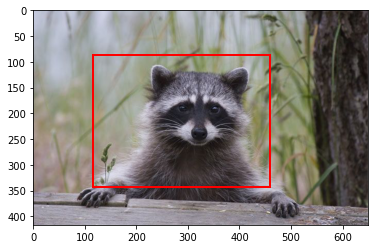

In [88]:
x0 = int(region[0][0] * image_width / IMAGE_SIZE) # Scale the BBox
y0 = int(region[0][1] * image_height / IMAGE_SIZE)

x1 = int((region[0][2]) * image_width / IMAGE_SIZE)
y1 = int((region[0][3]) * image_height / IMAGE_SIZE)


# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(unscaled)

# Create a Rectangle patch
rect = patches.Rectangle((x0, y0), (x1 - x0) , (y1 - y0) , linewidth=2, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()


# VGG16 Implementation

# VGG 16 Implementation
### Define a variable Image_size which takes accurate input according to the VGG16 model. 

In [39]:
Image_size = 224
Image_size_vgg = 224

### With the help of csvr.reader write a for loop which can load the train.csv file and store the path, width, height, x0,y0,x1,y1 in induvidual variables. <br>
1. Create a list variable known as 'path' which has all the path for all the training images
2. Create an array 'coords' which has the resized coordinates of the bounding box for the training images

<u>Note:</u> All the training images should be downsampled to 128 * 128 as it is the input shape of MobileNet (which we will be using for Object detection). Hence the corresponding coordinates of the bounding boxes should be changed to match the image dimension of 224 * 224 

In [40]:
coords = np.zeros((train.shape[0],4))

In [41]:
paths = []
for i, row in train.iterrows():
  paths.append(row['filename'])
  coords[i,0] = row['xmin'] * Image_size_vgg / row['width']
  coords[i,1] = row['ymin'] * Image_size_vgg / row['height']
  coords[i,2] = row['xmax'] * Image_size_vgg / row['width']
  coords[i,3] = row['ymax'] * Image_size_vgg / row['height']

### Write a for loop which can load all the training images into a variable 'batch_images' using the paths from the 'paths' variable
<u>Note:</u> Convert the image to RGB scale as the VGG16 accepts 3 channels as inputs   

In [49]:
batch_images_vgg  = np.zeros((len(paths),Image_size_vgg, Image_size_vgg,3),dtype=np.float32)

In [50]:
for i,j in enumerate(paths):
  img = Image.open('images/'+j)
  img=img.resize((Image_size, Image_size))
  img = img.convert('RGB')
  batch_images_vgg[i] = preprocess_input(np.array(img,dtype=np.float32))

In [51]:
batch_images_vgg.shape

(173, 224, 224, 3)

In [52]:
coords.shape

(173, 4)

In [53]:
len(coords)

173

### Define a vgg16 model and plot the model using plot_model function.
Hint:- Use RepeatVector,Conv1D,GlobalAveragePooling2D(optional to learner)

In [63]:
model_vgg = VGG16(input_shape=(Image_size_vgg,Image_size_vgg,3),include_top=False)
for layer in model_vgg.layers:
  layer.trainable = False

  x2=model_vgg.output
  x2=GlobalAveragePooling2D()(x2)
  x2=RepeatVector(8)(x2)
  x2=Conv1D(4, kernel_size=8,name="coords")(x2)
  x2=Flatten()(x2)

  Model_vgg=Model(inputs=model_vgg.input, outputs=x2)

### Plot the Vgg16 model using plot_model function.

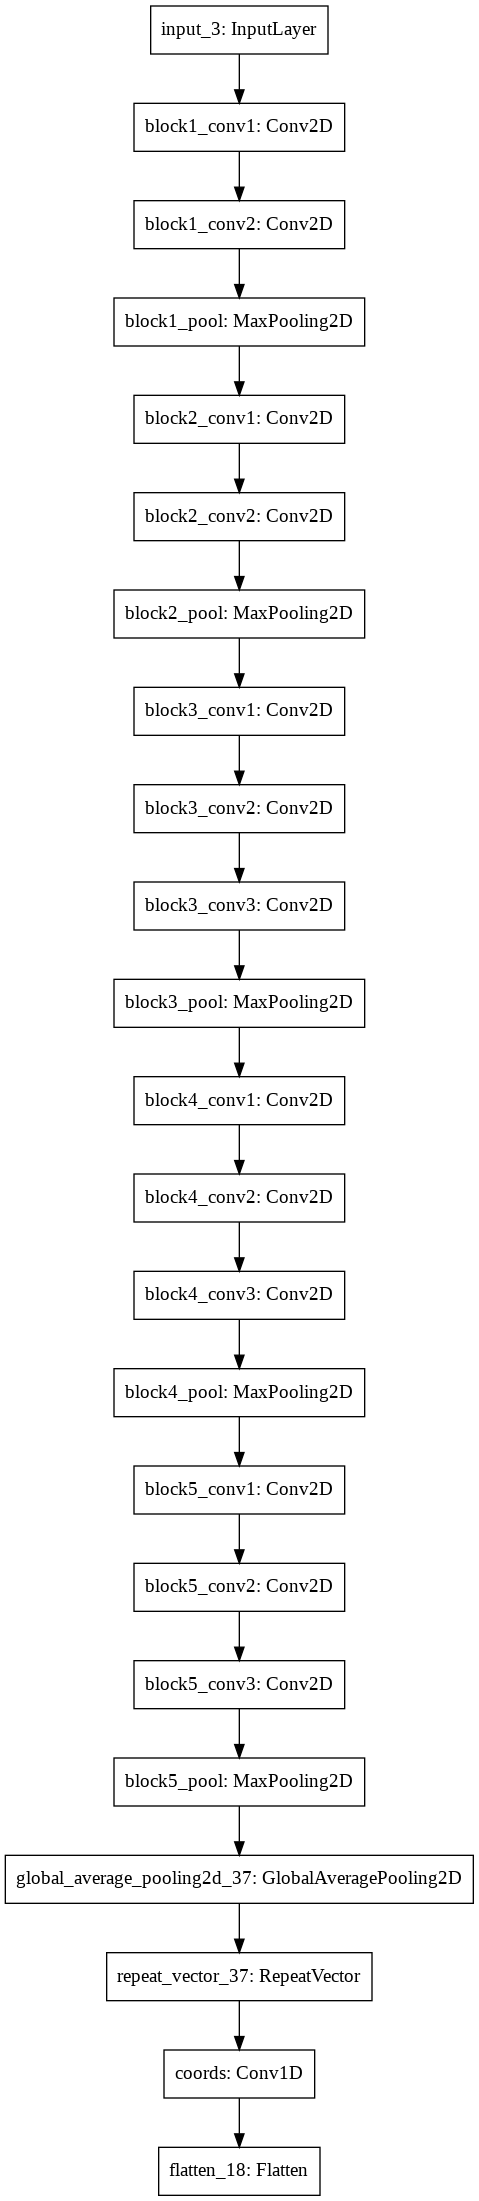

In [64]:
plot_model(Model_vgg)

### Write model.compile function & model.fit function with: <br>
1. Optimizer = Adam, Loss = 'mse' and metrics = IoU
2. Epochs = 30, batch_size = 32, verbose = 1

In [65]:
Model_vgg.compile(optimizer='Adam',loss='mse',metrics=[IoU])

In [66]:
Model_vgg.fit(batch_images_vgg,coords,epochs=30,batch_size=32,verbose=1)

Epoch 1/30
6/6 [==============================] - 56s 9s/step - loss: 14703.4854 - IoU: 0.0452
Epoch 2/30
6/6 [==============================] - 55s 9s/step - loss: 5633.1553 - IoU: 0.2236
Epoch 3/30
6/6 [==============================] - 55s 9s/step - loss: 2194.0601 - IoU: 0.4205
Epoch 4/30
6/6 [==============================] - 55s 9s/step - loss: 1873.3864 - IoU: 0.4723
Epoch 5/30
6/6 [==============================] - 55s 9s/step - loss: 2043.1774 - IoU: 0.4820
Epoch 6/30
6/6 [==============================] - 55s 9s/step - loss: 1839.1830 - IoU: 0.4995
Epoch 7/30
6/6 [==============================] - 55s 9s/step - loss: 1515.4106 - IoU: 0.5224
Epoch 8/30
6/6 [==============================] - 55s 9s/step - loss: 1406.3560 - IoU: 0.5172
Epoch 9/30
6/6 [==============================] - 55s 9s/step - loss: 1362.6416 - IoU: 0.5232
Epoch 10/30
6/6 [==============================] - 55s 9s/step - loss: 1309.2311 - IoU: 0.5316
Epoch 11/30
6/6 [==============================] - 55s 9s/

### Pick a test image from the given data

In [79]:
test_img_vgg = Image.open('/content/drive/MyDrive/ACN Lab 10/Test/Raccon_test2.jpg')
unscaled_vgg = Image.open('/content/drive/MyDrive/ACN Lab 10/Test/Raccon_test2.jpg')
unscaled_vgg.size

image_width = unscaled_vgg.size[0]
image_height = unscaled_vgg.size[1]


### Resize the image to 224 * 224 and preprocess the image for the VGG16

In [80]:
test_img_vgg = test_img_vgg.resize((Image_size, Image_size))
test_img_vgg = test_img_vgg.convert('RGB')
test_img_vgg = preprocess_input(np.array(test_img_vgg, dtype = np.float32))

### Predict the coordinates of the bounding box for the given test image

In [89]:
region_vgg = Model_vgg.predict(np.array([test_img_vgg]))
print(region_vgg)

[[ 33.261833  34.10408  153.54852  185.24593 ]]


### Plot the test image using .imshow and draw a boundary box around the image with the coordinates obtained from the model

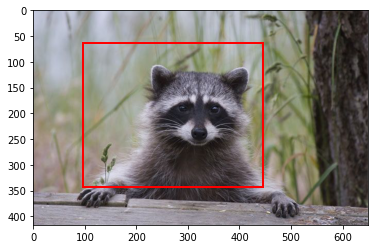

In [90]:
x0 = int(region_vgg[0][0] * image_width / Image_size) # Scale the BBox
y0 = int(region_vgg[0][1] * image_height / Image_size)

x1 = int((region_vgg[0][2]) * image_width / Image_size)
y1 = int((region_vgg[0][3]) * image_height / Image_size)


# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(unscaled_vgg)

# Create a Rectangle patch
rect = patches.Rectangle((x0, y0), (x1 - x0) , (y1 - y0) , linewidth=2, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()
